In [55]:
URL1 = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [56]:
import pandas as pd
import numpy as np`
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

In [57]:
import os
def get_Fremont_data(filename = 'Fremont.csv', url = URL1, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv',index_col= 'Date',parse_dates=True)
    data.columns = ["Total", "East", "West"]
    return data
    

In [58]:
data = get_Fremont_data('Fremont.csv', URL1)

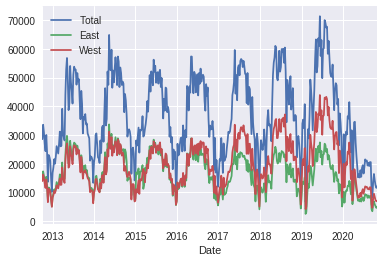

In [59]:
data.resample('W').sum().plot()

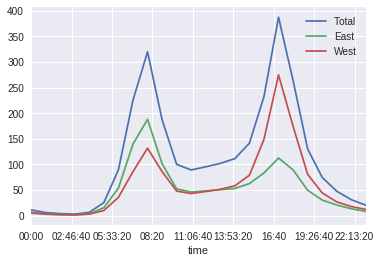

In [60]:
data.groupby(data.index.time).mean().plot()

In [61]:
pivoted = data.pivot_table("Total", index = data.index.time, columns=data.index.date)
pivoted.iloc[:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,7.0,3.0,7.0,4.0,2.0,4.0,5.0,6.0,1.0,12.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,3.0,0.0,3.0,3.0,1.0,2.0,5.0,6.0,1.0,6.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,0.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,4.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,8.0,4.0,0.0,3.0,6.0,8.0,6.0,5.0,4.0,3.0


In [62]:
pivoted.shape

(24, 2951)

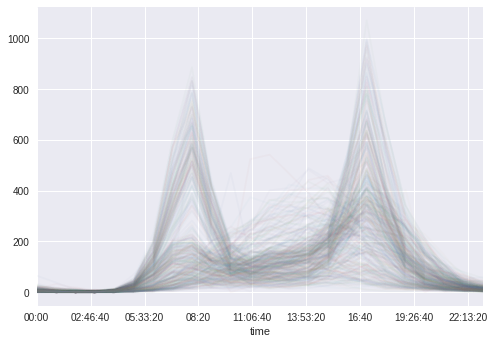

In [43]:
pivoted.iloc[:,2500:].plot(legend=False,alpha = 0.03)

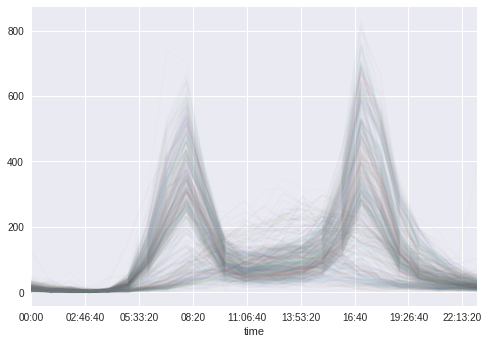

In [44]:
pivoted.iloc[:,:500].plot(legend=False,alpha = 0.03)

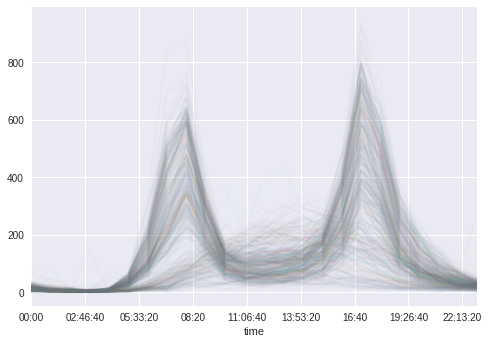

In [45]:
pivoted.iloc[:,500:1000].plot(legend=False,alpha = 0.03)

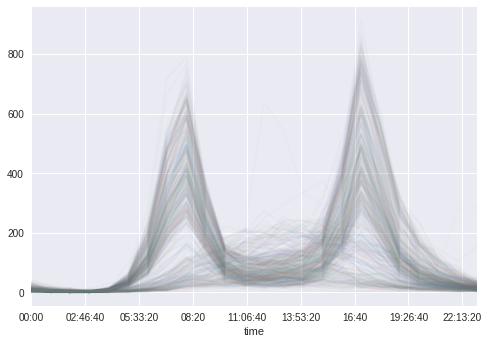

In [46]:
pivoted.iloc[:,1500:2000].plot(legend=False,alpha = 0.03)

In [49]:
pivoted_1 = data.pivot_table("East", index=data.index.time, columns= [data.index.date, data.index.month])
pivoted_1.iloc[:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
Date,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
00:00:00,4.0,7.0,4.0,8.0,6.0,4.0,8.0,8.0,7.0,8.0,...,1.0,1.0,3.0,1.0,2.0,4.0,0.0,1.0,0.0,1.0
01:00:00,4.0,3.0,4.0,10.0,12.0,2.0,1.0,1.0,4.0,7.0,...,2.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0
02:00:00,1.0,3.0,4.0,7.0,2.0,5.0,2.0,3.0,8.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
03:00:00,2.0,0.0,2.0,1.0,4.0,1.0,5.0,1.0,0.0,4.0,...,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
04:00:00,6.0,7.0,7.0,4.0,1.0,3.0,4.0,3.0,11.0,2.0,...,3.0,1.0,0.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0


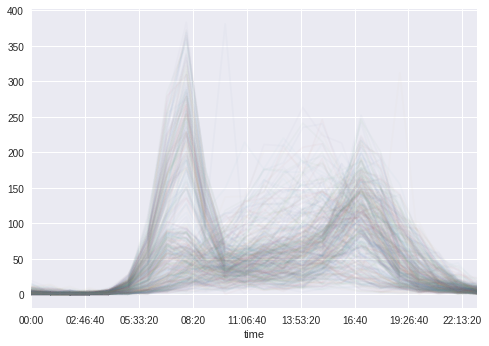

In [52]:
pivoted_1.iloc[:,2500:].plot(legend=False,alpha = 0.03)

In [51]:
pivoted_2 = data.pivot_table("West", index=data.index.time, columns= [data.index.date, data.index.month])
pivoted_1.iloc[:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
Date,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
00:00:00,4.0,7.0,4.0,8.0,6.0,4.0,8.0,8.0,7.0,8.0,...,1.0,1.0,3.0,1.0,2.0,4.0,0.0,1.0,0.0,1.0
01:00:00,4.0,3.0,4.0,10.0,12.0,2.0,1.0,1.0,4.0,7.0,...,2.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0
02:00:00,1.0,3.0,4.0,7.0,2.0,5.0,2.0,3.0,8.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
03:00:00,2.0,0.0,2.0,1.0,4.0,1.0,5.0,1.0,0.0,4.0,...,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
04:00:00,6.0,7.0,7.0,4.0,1.0,3.0,4.0,3.0,11.0,2.0,...,3.0,1.0,0.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0


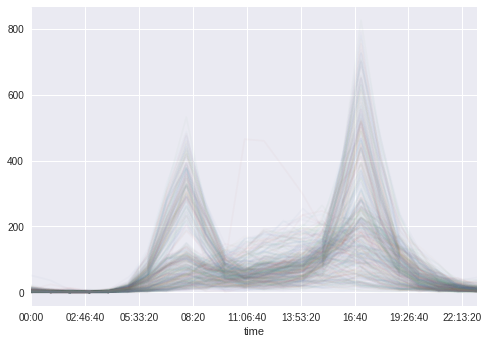

In [53]:
pivoted_2.iloc[:,2500:].plot(legend=False,alpha = 0.03)